In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

In [73]:
path = '../src/logs/wresnet28x10_cifar10_split0.05_controllerissue_trash/'
path = os.path.join(path,'logs.pkl')        
logs = pickle.load(open(path, "rb"))

In [92]:
def visualize_logs(logs):
    plt.plot(logs['train_loss'],label = 'train')
    plt.plot(logs['valid_loss'],label = 'valid')
    plt.yscale('log')
    plt.title("LOSS")
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    plt.plot(logs['train_top1'],label = 'train')
    plt.plot(logs['valid_top1'],label = 'valid')
    plt.yscale('linear')
    plt.title("Accuracy")
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    print("VALIDATION TOP1 ACC:",np.max(logs['valid_top1']))
    
    epochs = len(logs['policies'])
    for epoch in range(epochs):
        ops = []
        mags = []
        _policy = np.concatenate(logs['policies'][epoch])
        for i in range(len(_policy)):
            
            ops.append(_policy[i][0][0])
            ops.append(_policy[i][1][0])
            mags.append(int(float(_policy[i][0][1])*9))
            mags.append(int(float(_policy[i][1][1])*9))
    
    print(ops)
    print(mags)

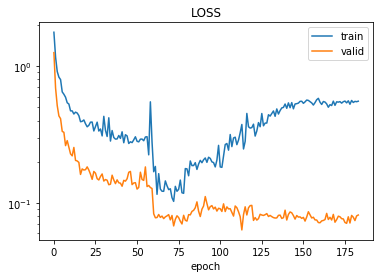

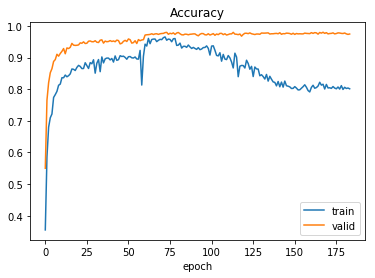

VALIDATION TOP1 ACC: 0.9800000003814697
['Contrast', 'Contrast', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'Brightness', 'Solarize', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'Sharpness', 'Sharpness', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'Equalize', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateX', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'Solarize', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'Cutout', 'Cutout', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY', 'TranslateY',

In [93]:
visualize_logs(logs)

In [80]:
np.concatenate(logs['policies'][-1])

array([[['Contrast', '0.0'],
        ['Contrast', '0.2222222222222222']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['Brightness', '0.0'],
        ['Solarize', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['Sharpness', '0.4'],
        ['Sharpness', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['TranslateY', '0.0'],
        ['TranslateY', '0.0']],

       [['Equalize', '0.4'],
    

In [20]:
data['policies'][-1]

[[[('Rotate', 0.4), ('TranslateY', 1.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)]],
 [[('TranslateY', 0.6), ('TranslateX', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)]],
 [[('Equalize', 0.6), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)]],
 [[('Rotate', 0.8), ('Invert', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)]],
 [[('ShearY', 0.6), ('Invert', 1.0)],
  [('TranslateY', 0.0), ('TranslateY', 0.0)],
  [('T